In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic') # 폰트 로드에 문제가 발생하여 출력 가능한 맑은체로 변경.

In [3]:
# A/B 테스트 데이터 생성
np.random.seed(404)

# A그룹 (기존 디자인): 전환율 12%
n_a = 500
conversion_rate_a = 0.12
conversions_a = np.random.binomial(1, conversion_rate_a, n_a)

# B그룹 (새 디자인): 전환율 15%
n_b = 500
conversion_rate_b = 0.15
conversions_b = np.random.binomial(1, conversion_rate_b, n_b)

# 데이터프레임 생성
ab_test_data = pd.DataFrame({
    'group': ['A']*n_a + ['B']*n_b,
    'user_id': range(1, n_a + n_b + 1),
    'converted': np.concatenate([conversions_a, conversions_b])
})

print("🧪 A/B 테스트 데이터")
print(f"A그룹 사용자 수: {n_a}명")
print(f"B그룹 사용자 수: {n_b}명")
print("\n그룹별 전환율:")
conversion_summary = ab_test_data.groupby('group')['converted'].agg(['count', 'sum', 'mean'])
conversion_summary.columns = ['총_사용자수', '전환_사용자수', '전환율']
print(conversion_summary)


🧪 A/B 테스트 데이터
A그룹 사용자 수: 500명
B그룹 사용자 수: 500명

그룹별 전환율:
       총_사용자수  전환_사용자수    전환율
group                        
A         500       60  0.120
B         500       56  0.112


In [6]:
#A그룹과 B그룹의 전환율과 표준오차를 계산해보세요.
# TODO: p_a 계산하기 (A그룹 전환율)
p_a = ab_test_data[ab_test_data['group'] == 'A']['converted'].mean()

# TODO: p_b 계산하기 (B그룹 전환율)
p_b = ab_test_data[ab_test_data['group'] == 'B']['converted'].mean()

# TODO: A그룹 표준오차 계산하기
# 힌트: 비율의 표준오차 공식은 sqrt(p(1-p)/n)
se_a = np.sqrt(p_a * (1 - p_a) / n_a) # 공식을 사용해서 계산하세요

# TODO: B그룹 표준오차 계산하기
se_b = np.sqrt(p_b * (1 - p_b) / n_b) # 공식을 사용해서 계산하세요

print(f"A그룹 전환율: {p_a:.3f} ± {se_a:.3f}")
print(f"B그룹 전환율: {p_b:.3f} ± {se_b:.3f}")

A그룹 전환율: 0.120 ± 0.015
B그룹 전환율: 0.112 ± 0.014


In [7]:
#해야할 일: A그룹의 95% 신뢰구간을 계산해보세요.
# TODO: 95% 신뢰구간용 z값 설정
z_score = 1.96 # 1.96을 사용하세요

# TODO: A그룹 신뢰구간 하한 계산
ci_a_lower = p_a - z_score * se_a

# TODO: A그룹 신뢰구간 상한 계산
ci_a_upper = p_a + z_score * se_a

print(f"A그룹 95% 신뢰구간: [{ci_a_lower:.3f}, {ci_a_upper:.3f}]")

A그룹 95% 신뢰구간: [0.092, 0.148]


In [8]:
# B그룹의 95% 신뢰구간을 계산해보세요.
# 95% 신뢰구간용 z값은 이미 설정되어 있습니다 (z_score = 1.96)

# B그룹 신뢰구간 하한 계산
ci_b_lower = p_b - z_score * se_b

# B그룹 신뢰구간 상한 계산
ci_b_upper = p_b + z_score * se_b

print(f"B그룹 95% 신뢰구간: [{ci_b_lower:.3f}, {ci_b_upper:.3f}]")

B그룹 95% 신뢰구간: [0.084, 0.140]


 이 코드는 계산된 B그룹의 전환율과 표준오차를 사용하여 B그룹 전환율의 95% 신뢰구간을 추정하고 그 결과를 출력하는 역할을 한다.

 결론 :
 결과 요약:

A그룹 (기존 디자인):
전환율: 0.120 (12.0%)
표준오차: 0.015
95% 신뢰구간: [0.092, 0.148]
B그룹 (새 디자인):
전환율: 0.112 (11.2%)
표준오차: 0.014
95% 신뢰구간: [0.084, 0.140]
결과 해석:

전환율 비교:
A그룹의 표본 전환율은 12.0%이고, B그룹의 표본 전환율은 11.2%입니다. 표본 데이터만 놓고 보면 A그룹의 전환율이 B그룹보다 0.8%p 더 높게 나타났습니다.
표준오차:
표준오차는 표본 전환율이 모집단 전환율과 얼마나 차이가 날 수 있는지, 즉 표본 전환율 값의 변동성을 나타냅니다. A그룹의 표준오차(0.015)와 B그룹의 표준오차(0.014)는 비슷하며, 이는 표본 크기가 같기 때문입니다. 표준오차가 작을수록 표본 평균이 모집단 평균을 더 정확하게 추정한다고 볼 수 있습니다.
95% 신뢰구간:
A그룹의 95% 신뢰구간 [0.092, 0.148]은 만약 동일한 방식으로 A/B 테스트를 100번 반복한다면, 그 중 95번은 A그룹의 실제 모집단 전환율이 이 구간 안에 포함될 것으로 기대한다는 의미입니다.
B그룹의 95% 신뢰구간 [0.084, 0.140] 역시 동일한 해석을 가집니다.

두 그룹의 신뢰구간 비교: A그룹의 신뢰구간 [0.092, 0.148]과 B그룹의 신뢰구간 [0.084, 0.140]은 상당 부분 겹칩니다. 두 신뢰구간이 겹친다는 것은 현재 표본 데이터만으로는 A그룹과 B그룹의 실제 모집단 전환율에 통계적으로 유의미한 차이가 있다고 단정하기 어렵다는 것을 시사합니다. 즉, 관찰된 0.8%p의 차이가 우연에 의한 것일 가능성도 배제할 수 없습니다.
결론:

현재까지의 계산 결과(전환율, 표준오차, 신뢰구간)만으로는 A그룹(기존 디자인)과 B그룹(새 디자인) 간의 전환율에 통계적으로 유의미한 차이가 있다고 보기 어렵습니다. 하지만 이는 신뢰구간 비교를 통한 직관적인 판단이며, 보다 정확한 통계적 결론을 내리기 위해서는 정식적인 가설 검정(예: Z-검정 또는 카이제곱 검정)을 수행.


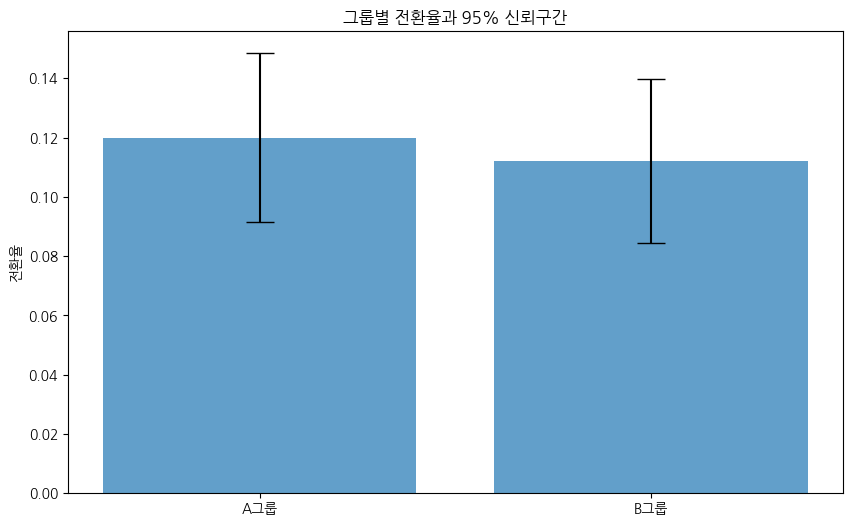

In [13]:
#### **그룹별 신뢰구간 시각화하기** 📊

#**🤔 해야할 일:** 막대그래프로 두 그룹의 전환율과 신뢰구간을 그려보세요.
# TODO: 그래프 그리기
plt.figure(figsize=(10, 6))

# TODO: 그룹명과 전환율 리스트 만들기
groups = ['A그룹', 'B그룹']
rates = [p_a, p_b]

# TODO: 오차막대 크기 계산 (z_score * 표준오차)
errors =  [z_score * se_a, z_score * se_b]

# TODO: 막대그래프 그리기
# 힌트: plt.bar(x, height, yerr=오차막대, capsize=10, alpha=0.7)
plt.bar(x=groups, height=rates, yerr=errors, capsize=10, alpha=0.7 )  # 빈칸을 채우세요

plt.ylabel('전환율')
plt.title('그룹별 전환율과 95% 신뢰구간')
plt.show()

In [15]:
#### **1-5: 전환율 차이 계산하기** 📊

#🤔 해야할 일:** B그룹이 A그룹보다 얼마나 더 좋은지 계산해보세요.
# TODO: 전환율 차이 계산 (B - A)
diff = p_b - p_a # B그룹 전환율 - A그룹 전환율

# TODO: 차이의 표준오차 계산
# 힌트: 두 독립 비율 차이의 표준오차는 sqrt(se_a^2 + se_b^2)
se_diff = np.sqrt(se_a**2 + se_b**2) # np.sqrt()를 사용하세요

print(f"전환율 차이 (B-A): {diff:.3f}")
print(f"차이의 표준오차: {se_diff:.3f}")

전환율 차이 (B-A): -0.008
차이의 표준오차: 0.020


In [16]:
#### **문제 1-6: 차이의 신뢰구간 계산하기** 🎯
#*🤔 해야할 일:** 전환율 차이의 95% 신뢰구간을 계산해보세요.
# TODO: 차이의 신뢰구간 하한 계산
ci_diff_lower = diff - 1.96 * se_diff

# TODO: 차이의 신뢰구간 상한 계산
ci_diff_upper =  diff + 1.96 * se_diff

print(f"전환율 차이의 95% 신뢰구간: [{ci_diff_lower:.3f}, {ci_diff_upper:.3f}]")

# TODO: 0이 포함되는지 확인하기
if ci_diff_lower > 0:
    print("🎉 B가 A보다 확실히 좋습니다!")
elif ci_diff_upper < 0:
    print("😢 A가 B보다 확실히 좋습니다.")
else:
    print("🤔 확실하지 않습니다.")


전환율 차이의 95% 신뢰구간: [-0.048, 0.032]
🤔 확실하지 않습니다.


 전환율 차이의 신뢰구간을 계산하여 그 구간이 0을 포함하는지 여부를 통해 A/B 테스트 결과의 통계적 유의성을 간접적으로 판단하는 역할을 합니다. 신뢰구간에 0이 포함되면 통계적으로 유의미한 차이가 없다고 해석하고, 0을 포함하지 않으면 유의미한 차이가 있다고 해석합니다.

In [18]:
#### **문제 1-7: 경영진 보고서 작성하기** 💼

#🤔 해야할 일:** 분석 결과를 정리해서 보고서를 만들어보세요.
# TODO: 보고서 완성하기
print("📋 경영진 보고서")
print("="*50)
print(f"🔍 분석 결과:")
print(f"   • A그룹 전환율: {p_a:.1%}")
print(f"   • B그룹 전환율: {p_b:.1%}")
print(f"   • 개선 효과: {diff:.1%}p")
print()
print(f"📊 통계적 신뢰도:")
print(f"   • 개선 효과 범위: {ci_diff_lower:.1%}p ~ {ci_diff_upper:.1%}p")
print()
print("💡 의사결정:")

# TODO: if문을 사용해서 권장사항 작성하기
# 힌트: ci_diff_lower > 0이면 새 디자인 도입 권장
if ci_diff_lower > 0: # 조건을 작성하세요:
    print("   ✅ 새 디자인(B) 도입을 권장합니다!")
else:
    print("   ❌ 추가 데이터 수집이 필요합니다.")


📋 경영진 보고서
🔍 분석 결과:
   • A그룹 전환율: 12.0%
   • B그룹 전환율: 11.2%
   • 개선 효과: -0.8%p

📊 통계적 신뢰도:
   • 개선 효과 범위: -4.8%p ~ 3.2%p

💡 의사결정:
   ❌ 추가 데이터 수집이 필요합니다.


분석 결과:

---


A그룹 전환율: 12.0% - 기존 디자인(A그룹)의 전환율은 12.0%였습니다.
B그룹 전환율: 11.2% - 새 디자인(B그룹)의 전환율은 11.2%였습니다.

---


개선 효과: -0.8%p - 새 디자인(B그룹)의 전환율이 기존 디자인(A그룹)보다 0.8%포인트(p) 낮게 나타났습니다.
즉, 표본 데이터 상으로는 새 디자인이 기존 디자인보다 성능이 좋지 않았습니다.

---


통계적 신뢰도:
개선 효과 범위: -4.8%p ~ 3.2%p - 이는 B그룹 전환율과 A그룹 전환율의 실제 차이(모집단에서의 차이)가 95%의 신뢰 수준으로 이 구간([-4.8%p, 3.2%p]) 안에 포함될 것으로 추정된다는 의미입니다.

---


💡 의사결정:
❌ 추가 데이터 수집이 필요합니다. - 이 의사결정은 '개선 효과 범위' (전환율 차이의 95% 신뢰구간)가 0을 포함하는지 여부에 기반합니다. 신뢰구간 [-4.8%p, 3.2%p]는 음수 값, *0*, 양수 값을 모두 포함하고 있습니다. 신뢰구간에 0이 포함된다는 것은 두 그룹 간의 실제 전환율 차이가 0일 가능성을 배제할 수 없다는 통계적 증거입니다. 따라서 현재 데이터만으로는 새 디자인이 기존 디자인보다 통계적으로 유의미하게 다르다고 결론 내리기 어렵습니다.

---


결론:

보고서는 표본 데이터 상으로는 새 디자인의 전환율이 약간 낮았지만, 통계적 분석 결과 (95% 신뢰구간에 0 포함) 현재 데이터만으로는 이 차이가 통계적으로 유의미하다고 볼 수 없다는 결론을 내립니다. 따라서 새 디자인 도입 여부를 결정하기 위해서는 추가적인 데이터 수집을 통해 더 명확한 통계적 증거를 확보하거나, 다른 비즈니스적 고려사항(예: 디자인 만족도, 사용자 피드백 등)을 함께 검토할 필요가 있어 보입니다.

## 미션 2: 연령대별 구매 분석 (t-검정 마스터하기!) 👥

### 🎯 학습 목표

t-검정의 다양한 종류를 실전에서 완벽하게 활용하기

### 📖 배경 스토리

온라인 쇼핑몰에서 "연령대에 따라 구매 패턴이 다를까?" 하는 궁금증이 생겼습니다.


In [19]:
# 온라인 쇼핑몰의 구매 데이터
np.random.seed(789)
ages = np.random.randint(20, 60, 100)
purchase_amounts = 50 + 2*ages + np.random.normal(0, 20, 100)

print("📊 구매 데이터 미리보기")
print(f"연령 범위: {ages.min()}세 ~ {ages.max()}세")
print(f"구매금액 범위: {purchase_amounts.min():.0f}만원 ~ {purchase_amounts.max():.0f}만원")
print(f"평균 구매금액: {purchase_amounts.mean():.1f}만원")


📊 구매 데이터 미리보기
연령 범위: 20세 ~ 59세
구매금액 범위: 39만원 ~ 208만원
평균 구매금액: 130.1만원


20세부터 59세까지의 가상 사용자 100명의 나이와 그에 따른 가상 구매 금액 데이터를 생성하고, 생성된 데이터의 기본적인 통계치(연령 및 구매 금액 범위, 평균 구매 금액)를 출력하여 데이터의 특성을 간략하게 보여주는 역할을 합니다. 이 데이터는 이후 연령과 구매 금액 간의 관계를 분석하거나 연령대별 구매 패턴을 비교하는 데 사용

In [ ]:
# ### **문제 2-1: 기본 f 통계량 계산하기** 🎯

#🤔 해야할 일:** 일표본 t-검정을 위한 기본 통계량을 계산해보세요.

In [21]:
# ### **문제 2-1: 기본 f 통계량 계산하기** 🎯

#🤔 해야할 일:** 일표본 t-검정을 위한 기본 통계량을 계산해보세요.

# TODO: 표본 평균 계산
sample_mean = purchase_amounts.mean()

# TODO: 표본 표준편차 계산
sample_std = purchase_amounts.std(ddof=1)

# TODO: 표본 크기 계산
n = len(purchase_amounts)

# TODO: 비교할 기준값 설정 (업계 기준 150만원)
standard_value = 150 # 150

print(f"표본 평균: {sample_mean:.2f}만원")
print(f"표본 표준편차: {sample_std:.2f}만원")
print(f"표본 크기: {n}명")
print(f"비교 기준값: {standard_value}만원")

표본 평균: 130.09만원
표본 표준편차: 33.90만원
표본 크기: 100명
비교 기준값: 150만원


In [23]:
# ### **문제 2-2: t-통계량 직접 계산하기** 🧮

#🤔 해야할 일:** t-검정의 t값을 직접 계산해보세요.
# TODO: t-통계량 공식 사용하기
# 힌트: t = (표본평균 - 기준값) / (표준편차 / sqrt(n))
t_stat = (sample_mean - standard_value) / (sample_std / np.sqrt(n))

print(f"직접 계산한 t-통계량: {t_stat:.3f}")

# 비교를 위해 scipy로도 계산해보기
from scipy.stats import ttest_1samp
t_stat_scipy, p_value = ttest_1samp(purchase_amounts, standard_value)
print(f"scipy로 계산한 t-통계량: {t_stat_scipy:.3f}")
print(f"p-value: {p_value:.4f}")

직접 계산한 t-통계량: -5.874
scipy로 계산한 t-통계량: -5.874
p-value: 0.0000


t-통계량 (-5.874):
t-통계량은 표본 평균(sample_mean = 130.09만원)이 귀무가설에서 제시하는 모집단 평균(기준값 standard_value = 150만원)과 표준오차 단위로 얼마나 떨어져 있는지를 나타내는 값입니다.
값의 절댓값이 클수록 표본 평균과 기준값 사이의 차이가 크다는 것을 의미합니다. -5.874라는 값은 표본 평균이 기준값 150만원보다 약 5.874 표준오차만큼 작다는 것을 나타냅니다.
p-value (0.0000):
p-value는 귀무가설(모집단 평균 구매 금액이 150만원과 같다)이 사실이라고 가정할 때, 현재 표본 데이터와 같거나 더 극단적인 결과가 우연히 나타날 확률입니다.
계산된 p-value는 0.0000으로 매우 작습니다. **굵은 텍스트**일반적으로 통계적 유의수준 알파(α)를 0.05 (또는 5%)로 설정합니다.
p-value (0.0000)가 유의수준 알파 (0.05)보다 매우 작습니다.
결론:

p-value (0.0000)가 일반적인 유의수준 0.05보다 훨씬 작으므로, 우리는 귀무가설을 기각합니다.

이는 온라인 쇼핑몰 사용자의 평균 구매 금액이 150만원과 통계적으로 유의미한 차이가 있다는 것을 의미합니다. 특히, 표본 평균(130.09만원)이 기준값(150만원)보다 낮으므로, 실제 모집단의 평균 구매 금액은 150만원보다 낮다고 결론

In [ ]:
### **문제 2-3: 결과 해석하기** 🎯

#🤔 해야할 일:** p-value를 보고 결과를 해석해보세요.

In [24]:
# TODO: 유의수준 설정
alpha = 0.05

print("🎯 결과 해석")

# TODO: p-value와 alpha 비교하기
if  p_value < alpha:
    print(f"✅ p-value ({p_value:.4f}) < α ({alpha})")
    print("→ 귀무가설 기각! 업계 기준과 유의하게 다릅니다.")

    # TODO: 평균이 더 큰지 작은지 확인하기
    if  sample_mean > standard_value:
        print("→ 우리 고객들이 업계 평균보다 더 많이 구매합니다! 🎉")
    else:
        print("→ 우리 고객들이 업계 평균보다 적게 구매합니다. 😅")
else:
    print(f"❌ p-value ({p_value:.4f}) ≥ α ({alpha})")
    print("→ 업계 기준과 유의한 차이가 없습니다.")


🎯 결과 해석
✅ p-value (0.0000) < α (0.05)
→ 귀무가설 기각! 업계 기준과 유의하게 다릅니다.
→ 우리 고객들이 업계 평균보다 적게 구매합니다. 😅


In [ ]:
#### **문제 2-4: 연령대별 그룹 나누기** 👥

#🤔 해야할 일:** 독립표본 t-검정을 위해 데이터를 두 그룹으로 나누세요.

In [26]:
# TODO: 젊은층 데이터 필터링 (20-39세)
young_mask =  (ages >= 20) & (ages <= 39)
group1_purchases = purchase_amounts[young_mask]

# TODO: 중년층 데이터 필터링 (40-59세)
middle_mask = (ages >= 40) & (ages <= 59) # 조건 작성
group2_purchases =  purchase_amounts[middle_mask]

print("👥 그룹 나누기 결과")
print(f"젊은층 (20-39세): {len(group1_purchases)}명")
print(f"중년층 (40-59세): {len(group2_purchases)}명")

👥 그룹 나누기 결과
젊은층 (20-39세): 47명
중년층 (40-59세): 53명


In [27]:
# ### **문제 2-5: 그룹별 기술통계 계산하기** 📊

#🤔 해야할 일:** 각 그룹의 평균과 표준편차를 계산해보세요.
# TODO: 각 그룹의 평균 계산
group1_mean =  group1_purchases.mean()
group2_mean =  group2_purchases.mean()

# TODO: 각 그룹의 표준편차 계산
group1_std =  group1_purchases.std()
group2_std =  group2_purchases.std()

print("📊 그룹별 기술통계")
print(f"젊은층 평균: {group1_mean:.1f}만원 (표준편차: {group1_std:.1f})")
print(f"중년층 평균: {group2_mean:.1f}만원 (표준편차: {group2_std:.1f})")

# TODO: 평균 차이 계산
diff =  group2_mean - group1_mean
print(f"평균 차이: {diff:.1f}만원")
#

📊 그룹별 기술통계
젊은층 평균: 106.4만원 (표준편차: 25.0)
중년층 평균: 151.1만원 (표준편차: 25.6)
평균 차이: 44.6만원


In [33]:
# ### **문제 2-6: 독립표본 t-검정 실행하기** 🧪

#🤔 해야할 일:** 두 그룹 간의 차이를 t-검정으로 확인해보세요.

from scipy.stats import ttest_ind

# TODO: 독립표본 t-검정 실행(서로 독립적인 두 집단의 평균 비교)
t_stat, p_value =  ttest_ind(group1_purchases, group2_purchases)

print("🧮 t-검정 결과")
print(f"t-통계량: {t_stat:.3f}")
print(f"p-value: {p_value:.4f}")

# TODO: 결과 해석하기
alpha = 0.05
print("🎯 비즈니스 해석")

if  p_value < alpha :
    print("✅ 통계적으로 유의한 차이가 있습니다!")

    if group2_mean > group1_mean :
        print("→ 중년층이 젊은층보다 더 많이 구매합니다!")
    else:
        print("→ 젊은층이 중년층보다 더 많이 구매합니다!")
else:
    print("❌ 통계적으로 유의한 차이가 없습니다.")


🧮 t-검정 결과
t-통계량: -8.709
p-value: 0.0000
🎯 비즈니스 해석
✅ 통계적으로 유의한 차이가 있습니다!
→ 중년층이 젊은층보다 더 많이 구매합니다!


In [36]:
# ### **문제 2-7: 등분산성 검정하기** 🔍

#🤔 해야할 일:** 두 그룹의 분산이 같은지 확인해보세요.
from scipy.stats import levene

# TODO: 분산 직접 비교하기
var1 =  group1_purchases.var(ddof=1)
var2 =  group2_purchases.var(ddof=1)

print("📊 분산 비교")
print(f"젊은층 분산: {var1:.1f}")
print(f"중년층 분산: {var2:.1f}")

# TODO: Levene 검정 실행하기
levene_stat, levene_p =  levene(group1_purchases, group2_purchases)

print("🧪 Levene 등분산성 검정")
print(f"p-value: {levene_p:.4f}")

# TODO: 등분산성 판단하기
if  levene_p >= 0.05:
    print("✅ 등분산성 가정 만족")
else:
    print("❌ 등분산성 가정 위배")


📊 분산 비교
젊은층 분산: 637.1
중년층 분산: 669.5
🧪 Levene 등분산성 검정
p-value: 0.8106
✅ 등분산성 가정 만족


## 미션 3: 직원 만족도 종합 분석 🏢

### 🎯 학습 목표

상관관계, 회귀분석, 로지스틱 회귀를 실전에서 종합적으로 활용하기

In [40]:
# 직원 만족도 종합 데이터 생성
np.random.seed(2024)
n = 250

data_hr = {
    '연봉': np.random.lognormal(np.log(50000), 0.3, n),
    '근무연수': np.random.exponential(3, n),
    '부서': np.random.choice(['영업', '개발', '마케팅', '인사'], n, p=[0.3, 0.4, 0.2, 0.1]),
    '교육시간': np.random.gamma(2, 10, n),
    '직급': np.random.choice(['사원', '대리', '과장', '부장'], n, p=[0.4, 0.3, 0.2, 0.1])
}

df_hr = pd.DataFrame(data_hr)

# 만족도 점수 (1-10점) 생성
satisfaction_base = (
    df_hr['연봉']/10000 * 0.8 +
    df_hr['근무연수'] * 0.3 +
    df_hr['교육시간'] * 0.1
)

dept_effect = df_hr['부서'].map({'영업': -0.5, '개발': 0.8, '마케팅': 0.3, '인사': 0.0})
rank_effect = df_hr['직급'].map({'사원': 0, '대리': 0.5, '과장': 1.0, '부장': 1.5})

satisfaction = satisfaction_base + dept_effect + rank_effect + np.random.normal(0, 0.8, n)
satisfaction = np.clip(satisfaction, 1, 10)

# 이직 의향
turnover_prob = 1 / (1 + np.exp(satisfaction - 5))
turnover_intent = np.random.binomial(1, turnover_prob, n)

df_hr['만족도'] = satisfaction.round(1)
df_hr['이직의향'] = turnover_intent

print("📊 직원 만족도 데이터 (처음 5개 행)")
print(df_hr.head())

📊 직원 만족도 데이터 (처음 5개 행)
             연봉      근무연수   부서       교육시간  직급   만족도  이직의향
0  82470.215328  5.843045   개발   4.431883  과장  10.0     0
1  62378.915363  1.803688   개발   1.373603  대리   8.2     0
2  47066.508609  0.211051  마케팅  17.196300  과장   7.6     0
3  47786.798588  4.785220   개발  49.198119  과장  10.0     0
4  65814.392648  2.060981   영업  18.363062  사원   9.1     0


In [ ]:
# ### **문제 3-1: 상관관계 매트릭스 만들기** 🔍
#🤔 해야할 일:** 숫자형 변수들 간의 상관관계를 확인해보세요.

 다양한 요인(연봉, 근무연수, 부서, 교육시간, 직급)이 직원 만족도에 영향을 미치고, 그 만족도가 이직 의향에 영향을 주는 가상의 시나리오를 기반으로 데이터를 생성하는 역할을 합니다. 생성된 데이터는 이후 직원 만족도와 이직 의향에 대한 분석(상관관계, 회귀분석 등)에 사용될 것

In [42]:
# ### **상관관계 매트릭스 만들기** 🔍

# 해야할 일:** 숫자형 변수들 간의 상관관계를 확인해보세요.
# TODO: 숫자형 변수들만 선별하기
numeric_cols = ['연봉', '근무연수', '교육시간', '만족도', '이직의향']
correlation_data = df_hr[numeric_cols]

# TODO: 상관계수 매트릭스 계산하기
correlation_matrix =  correlation_data.corr()

print("📊 상관계수 매트릭스")
print(correlation_matrix.round(3))


📊 상관계수 매트릭스
         연봉   근무연수   교육시간    만족도   이직의향
연봉    1.000  0.101 -0.003  0.567 -0.265
근무연수  0.101  1.000 -0.062  0.389 -0.130
교육시간 -0.003 -0.062  1.000  0.484 -0.276
만족도   0.567  0.389  0.484  1.000 -0.534
이직의향 -0.265 -0.130 -0.276 -0.534  1.000


이 매트릭스를 통해 '만족도'와 '이직의향' 같은 주요 변수들이 다른 변수들(연봉, 근무연수, 교육시간)과 어떤 선형적 관계를 가지는지 한눈에 파악할 수 있습니다. 예를 들어, '만족도'와 '이직의향' 사이의 음의 상관계수 값은 만족도가 높을수록 이직 의향이 낮아지는 경향이 있음을 시사

In [43]:
#### **문제 3-2: 만족도와의 상관관계 분석하기** 🎯

#해야할 일:** 어떤 변수가 만족도와 가장 관련이 높은지 찾아보세요.

# TODO: 만족도와의 상관관계만 추출하기
satisfaction_corr =  correlation_matrix['만족도'].sort_values(ascending=False)
# DESC sorting series
print("🎯 만족도와의 상관관계 (높은 순)")

# TODO: for문으로 각 변수별 상관관계 출력하기
for var, corr in satisfaction_corr.items():
    if var != '만족도':  # 만족도 자기 자신 제외
        # TODO: 상관관계 강도 판단하기
        if abs(corr) > 0.5:
            strength = "강한"
        elif abs(corr) > 0.3:
            strength = "중간"
        else:
            strength = "약한"

        direction = "양의" if corr > 0 else "음의"
        print(f"• {var}: {corr:.3f} ({strength} {direction} 상관관계)")


🎯 만족도와의 상관관계 (높은 순)
• 연봉: 0.567 (강한 양의 상관관계)
• 교육시간: 0.484 (중간 양의 상관관계)
• 근무연수: 0.389 (중간 양의 상관관계)
• 이직의향: -0.534 (강한 음의 상관관계)


 어떤 변수가 직원 만족도와 가장 강한 양의 또는 음의 선형 관계를 가지는지 쉽게 파악할 수 있습니다. 예를 들어, '만족도'와의 상관관계가 가장 높은 변수는 직원 만족도에 가장 큰 영향을 미칠 가능성이 높은 변수일 수 있습니다.

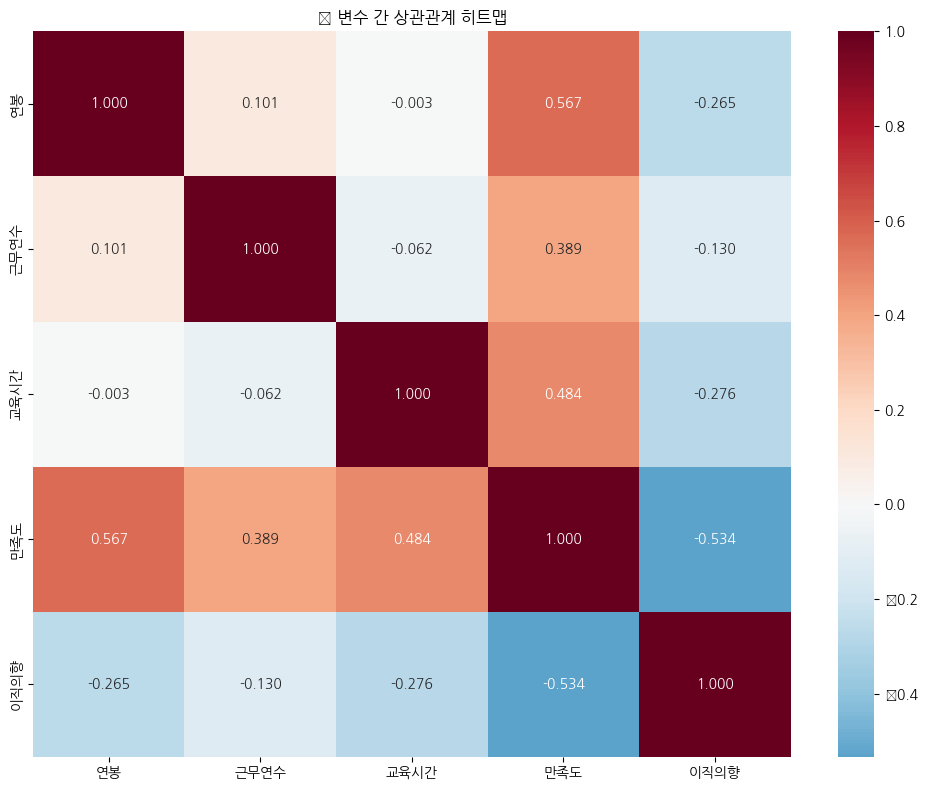

In [45]:
#### **문제 3-3: 상관관계 히트맵 그리기** 📈

#🤔 해야할 일:** 상관관계를 시각적으로 표현해보세요.

# TODO: 히트맵 그리기
plt.figure(figsize=(10, 8))

# TODO: seaborn heatmap 사용하기
# satisfaction_corr 대신 correlation_matrix를 사용합니다.
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, fmt='.3f')


plt.title('📊 변수 간 상관관계 히트맵')
plt.tight_layout()
plt.show()

붉은 계열의 색상은 양의 상관관계를 나타냅니다 (한 변수가 증가할 때 다른 변수도 증가). 색이 진할수록 관계가 강합니다.
푸른 계열의 색상은 음의 상관관계를 나타냅니다 (한 변수가 증가할 때 다른 변수는 감소). 색이 진할수록 관계가 강합니다.
흰색 또는 회색 계열은 상관관계가 약하거나 거의 없음을 나타냅니다 (0에 가까움).
숫자 (Annotated values):
각 셀에 표시된 숫자는 해당 변수 쌍 간의 정확한 피어슨 상관계수 값입니다. 이 값은 -1부터 +1 사이입니다.
주요 관찰 결과 해석:

'만족도'와 다른 변수들:
'만족도'와 '연봉' (0.567): 강한 양의 상관관계를 보입니다. 연봉이 높을수록 만족도가 높아지는 경향이 있습니다.
'만족도'와 '교육시간' (0.484): 중간 정도의 양의 상관관계를 보입니다. 교육 시간이 많을수록 만족도가 높아지는 경향이 있습니다.
'만족도'와 '근무연수' (0.389): 중간 정도의 양의 상관관계를 보입니다. 근무연수가 길수록 만족도가 높아지는 경향이 있습니다.
'만족도'와 '이직의향' (-0.534): 강한 음의 상관관계를 보입니다. 만족도가 높을수록 이직 의향이 낮아지는 매우 중요한 관계를 나타냅니다.
'이직의향'와 다른 변수들:
'이직의향'과 '만족도' (-0.534): 위에서 언급했듯이 강한 음의 상관관계입니다.
'이직의향'과 '연봉' (-0.265), '근무연수' (-0.130), '교육시간' (-0.276): 이 변수들과는 약하거나 중간 정도의 음의 상관관계를 보입니다. 즉, 연봉, 근무연수, 교육시간이 많을수록 이직 의향이 다소 낮아지는 경향이 있지만, '만족도'만큼 강한 관계는 아닙니다.
다른 변수들 간의 관계:
'연봉', '근무연수', '교육시간' 등 독립 변수들 간에는 대체로 약하거나 중간 정도의 상관관계가 있습니다. 이는 다중 회귀 분석 시 다중공선성 문제를 크게 우려하지 않아도 될 가능성을 시사합니다 (하지만 더 정확한 진단 필요).
결론:

## 히트맵 분석 결과, 직원 만족도에 가장 강하게 영향을 미치는 숫자형 변수는 '연봉'으로 보이며, '교육시간', '근무연수'도 중간 정도의 긍정적인 영향을 미칩니다. 그리고 예상대로 직원 만족도가 높을수록 이직 의향은 크게 낮아지는 경향이 있음을 명확히 확인할 수 있습니다.

In [46]:
#### **문제 3-4: 부서별 만족도 비교하기** 🏢

#🤔 해야할 일:** 부서별로 만족도와 이직의향을 비교해보세요.

# TODO: 부서별 그룹화해서 평균 계산하기
dept_summary =  df_hr.groupby('부서')['만족도'].mean()

print("🏢 부서별 평균 만족도")
print(dept_summary.round(2))

# TODO: 부서별 이직의향도 계산하기
dept_turnover =  df_hr.groupby('부서')['이직의향'].mean()

print("\n🏢 부서별 이직의향")
print(dept_turnover.round(3))

# TODO: for문으로 부서별 상세 분석 출력하기
print("\n📋 부서별 상세 분석")
for dept in df_hr['부서'].unique():
    # TODO: 해당 부서 데이터만 필터링하기
    dept_data =  df_hr[df_hr['부서'] == dept]

    satisfaction_avg = dept_data['만족도'].mean()
    turnover_avg = dept_data['이직의향'].mean()

    print(f"{dept}부: 만족도 {satisfaction_avg:.1f}점, 이직의향 {turnover_avg:.1%}")


🏢 부서별 평균 만족도
부서
개발     7.76
마케팅    7.82
영업     6.96
인사     6.93
Name: 만족도, dtype: float64

🏢 부서별 이직의향
부서
개발     0.139
마케팅    0.208
영업     0.276
인사     0.278
Name: 이직의향, dtype: float64

📋 부서별 상세 분석
개발부: 만족도 7.8점, 이직의향 13.9%
마케팅부: 만족도 7.8점, 이직의향 20.8%
영업부: 만족도 7.0점, 이직의향 27.6%
인사부: 만족도 6.9점, 이직의향 27.8%


In [48]:
#### **문제 3-5: 더미 변수 생성하기** 🔧

#🤔 해야할 일:** 회귀분석을 위해 범주형 변수를 더미 변수로 변환하세요.
# TODO: 부서를 더미 변수로 변환하기
dept_dummies =  pd.get_dummies(df_hr['부서'], prefix='부서')

# TODO: 직급을 더미 변수로 변환하기
rank_dummies =  pd.get_dummies(df_hr['직급'], prefix='직급')

# TODO: 기준 카테고리 제거하기 (다중공선성 방지): 완변한 선형관계를 제거하면서 선형 종속성이 풀리고, 모델에서 각 더미 변수의 계수는 기준 범주 대비 효과를 나타낸다.
dept_dummies =  dept_dummies.drop('부서_인사', axis=1)
rank_dummies =  rank_dummies.drop('직급_사원', axis=1)

print("생성된 더미 변수들:")
print("부서:", list(dept_dummies.columns))
print("직급:", list(rank_dummies.columns))


생성된 더미 변수들:
부서: ['부서_개발', '부서_마케팅', '부서_영업']
직급: ['직급_과장', '직급_대리', '직급_부장']


In [50]:
### **문제 3-6: 회귀분석용 데이터 준비하기** 🔧

# 해야할 일:** 독립변수와 종속변수를 준비하세요.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# TODO: 독립변수 데이터프레임 만들기
X_vars =  pd.concat([df_hr[['연봉', '근무연수', '교육시간']], dept_dummies, rank_dummies], axis=1)
# 힌트: df_hr[['연봉', '근무연수', '교육시간']]과 더미변수들을 합치세요

# TODO: 종속변수 설정하기
y_var =  df_hr['만족도']

print("🔧 회귀분석 변수 구성")
print(f"독립변수 개수: {len(X_vars.columns)}개")
print(f"독립변수: {list(X_vars.columns)}")
print(f"종속변수: 만족도")

🔧 회귀분석 변수 구성
독립변수 개수: 9개
독립변수: ['연봉', '근무연수', '교육시간', '부서_개발', '부서_마케팅', '부서_영업', '직급_과장', '직급_대리', '직급_부장']
종속변수: 만족도


In [57]:
#### **문제 3-7: 회귀분석 실행하기** 📊

#*🤔 해야할 일:** 다중회귀분석을 실행하고 R²을 계산하세요.
# TODO: 회귀모델 생성 및 학습하기: 하나 또는 여러개의 독립/설명변수로부터 연속적인 값을 예측, 통계/머신러닝 모델이다. 선형 회귀에 사용.

model =  LinearRegression()
model.fit(X_vars, y_var)

# TODO: 예측값 계산하기
y_pred = model.predict(X_vars)

# TODO: R² 계산하기
r2 = r2_score(y_var, y_pred)

print("📊 다중회귀분석 결과")
print(f"R² (설명력): {r2:.3f} ({r2*100:.1f}%)")


📊 다중회귀분석 결과
R² (설명력): 0.800 (80.0%)


In [58]:
#### **문제 3-8: 회귀계수 해석하기** 🔍

#🤔 해야할 일:** 어떤 변수가 만족도에 가장 큰 영향을 미치는지 찾아보세요.
# TODO: 회귀계수를 데이터프레임으로 정리하기
coefficients = pd.DataFrame({
    '변수':  X_vars.columns,
    '계수': model.coef_,
    '절댓값': np.abs(model.coef_)
})

# TODO: 절댓값 기준으로 정렬하기
coefficients =  coefficients.sort_values('절댓값', ascending=False)

print("🔍 회귀계수 분석 (영향력 순)")
print(coefficients.head(5))  # 상위 5개만 출력

# TODO: 가장 영향력이 큰 변수 찾기
most_important =  coefficients.iloc[0]
print(f"\n가장 영향력이 큰 변수: {most_important['변수']} (계수: {most_important['계수']:.3f})")


🔍 회귀계수 분석 (영향력 순)
      변수        계수       절댓값
8  직급_부장  1.393631  1.393631
6  직급_과장  0.764017  0.764017
3  부서_개발  0.497000  0.497000
5  부서_영업 -0.496424  0.496424
7  직급_대리  0.325535  0.325535

가장 영향력이 큰 변수: 직급_부장 (계수: 1.394)


In [59]:
# ### **문제 3-9: 로지스틱 회귀 데이터 준비하기** 🎯

#🤔 해야할 일:** 이직 의향을 예측하기 위한 로지스틱 회귀를 준비하세요.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# TODO: 로지스틱 회귀용 독립변수와 종속변수 설정하기
X_logistic =  X_vars
y_logistic = df_hr['이직의향']

# TODO: 현재 이직 의향 현황 파악하기
turnover_summary =  df_hr['이직의향'].value_counts()
turnover_rate =  df_hr['이직의향'].mean()

print("📊 현재 이직 의향 현황")
print(f"이직 의향 있음: {turnover_summary[1]}명 ({turnover_rate:.1%})")
print(f"이직 의향 없음: {turnover_summary[0]}명 ({1-turnover_rate:.1%})")


📊 현재 이직 의향 현황
이직 의향 있음: 51명 (20.4%)
이직 의향 없음: 199명 (79.6%)


In [63]:
# ### **문제 3-10: 로지스틱 회귀 모델 학습하기** 🤖

#🤔 해야할 일:** 로지스틱 회귀 모델을 학습시키고 예측을 수행하세요.

# TODO: 로지스틱 회귀 모델 생성하기
logistic_model =  LogisticRegression(random_state=42, max_iter=1000)

# TODO: 모델 학습하기
logistic_model.fit(X_logistic, y_logistic)

# TODO: 이직 확률 예측하기
y_pred_proba =  logistic_model.predict_proba(X_logistic)[:, 1]

# TODO: 이직 여부 예측하기 (0 또는 1)
y_pred_class =  logistic_model.predict(X_logistic)

# TODO: 정확도 계산하기
accuracy =  (y_pred_class == y_logistic).mean()

print("🤖 로지스틱 회귀 모델 성능")
print(f"정확도: {accuracy:.3f}")


🤖 로지스틱 회귀 모델 성능
정확도: 0.864


In [67]:
# ### **문제 3-11: 혼동 행렬 만들기** 📋

#🤔 해야할 일:** 모델의 예측 성능을 자세히 분석해보세요.
# TODO: 혼동 행렬 계산하기
cm =  confusion_matrix(y_logistic, y_pred_class)

print("📋 혼동 행렬")
print("실제 → 예측    이직안함  이직함")
print(f"이직 안함        {cm[0,0]:3d}    {cm[0,1]:3d}")
print(f"이직 함          {cm[1,0]:3d}    {cm[1,1]:3d}")

# TODO: 정밀도와 재현율 계산하기
# TP = cm[1, 1], FP = cm[0, 1], FN = cm[1, 0]
precision =  cm[1,1] / (cm[1,1] + cm[0,1]) if (cm[1,1] + cm[0,1]) > 0 else 0
recall =  cm[1,1] / (cm[1,1] + cm[1,0]) if (cm[1,1] + cm[1,0]) > 0 else 0

print(f"\n정밀도: {precision:.3f}")
print(f"재현율: {recall:.3f}")

📋 혼동 행렬
실제 → 예측    이직안함  이직함
이직 안함        193      6
이직 함           28     23

정밀도: 0.793
재현율: 0.451


정밀도 (Precision): 0.793
정의: 모델이 '이직 의향 있음'으로 예측한 경우 중에서 실제로 이직 의향이 있는 직원의 비율입니다.
공식: TP / (TP + FP) = 23 / (23 + 6) = 23 / 29 ≈ 0.793
해석: 이 모델이 '이직 의향 있음'이라고 예측한 직원 29명 중에서 실제로 이직 의향이 있는 직원은 23명입니다. 즉, 모델의 '이직 의향 있음' 예측은 약 79.3%의 정확성을 가집니다. 모델이 잘못 이직한다고 예측하는 직원(FP)이 얼마나 적은가를 나타내는 지표입니다. 정밀도가 높을수록 모델이 긍정(이직)으로 예측한 결과에 대한 신뢰도가 높다고 볼 수 있습니다.
재현율 (Recall) (또는 민감도, Sensitivity): 0.451
정의: 실제로 이직 의향이 있는 직원들 중에서 모델이 '이직 의향 있음'으로 올바르게 예측한 직원의 비율입니다.
공식: TP / (TP + FN) = 23 / (23 + 28) = 23 / 51 ≈ 0.451
해석: 실제 이직 의향이 있는 직원 51명 중에서 이 모델이 이직 의향이 있다고 제대로 잡아낸 직원(TP)은 23명입니다. 즉, 모델은 실제 이직 의향이 있는 직원의 약 45.1%만을 탐지했습니다. 모델이 실제 긍정(이직)인 직원을 얼마나 잘 놓치지 않고 잡아내는가(FN을 얼마나 줄이는가)를 나타내는 지표입니다. 재현율이 높을수록 모델이 중요한 긍정 사례(이직 의향 있는 직원)를 놓칠 확률이 낮다고 볼 수 있습니다.
결론:

이 모델의 정밀도 (0.793)는 비교적 높은 편입니다. 이는 모델이 이직 의향이 있다고 예측한 직원들 대부분(약 79.3%)은 실제로 이직 의향이 있을 가능성이 높다는 것을 의미합니다. 즉, 모델의 긍정 예측은 꽤 신뢰할 만합니다.
반면에 재현율 (0.451)은 상대적으로 낮습니다. 이는 실제 이직 의향이 있는 직원들 중에서 모델이 이직할 것이라고 제대로 예측하지 못하는 직원(FN)이 많다는 것을 의미합니다. 모델이 실제 이직 위험이 있는 직원의 절반 이상(약 54.9%)을 놓치고 있습니다.
비즈니스 목표에 따라 정밀도와 재현율 중 어떤 지표가 더 중요하게 고려될 수 있습니다. 예를 들어, 이직 의향이 있다고 잘못 예측하여 불필요한 조치를 취하는 비용이 크다면 정밀도가 중요하고, 실제 이직 위험이 있는 직원을 놓치는 것(이직 방지 기회를 놓치는 것)의 비용이 크다면 재현율이 더 중요할 수 있습니다. 현재 모델은 '이직 의향 있음'이라고 예측하는 것은 비교

In [68]:
# ### **문제 3-12: 오즈비 계산하기** 📈

#🤔 해야할 일:** 각 변수가 이직 확률에 미치는 영향을 분석하세요.
# TODO: 오즈비 계산하기
# 힌트: 오즈비 = exp(회귀계수)
odds_ratios =  np.exp(logistic_model.coef_[0])

# TODO: 오즈비 분석 데이터프레임 만들기
odds_analysis = pd.DataFrame({
    '변수': X_logistic.columns,
    '계수': logistic_model.coef_[0],
    '오즈비': odds_ratios,
    '위험도변화':  [(or_val - 1) * 100 for or_val in odds_ratios]
})

# TODO: 위험도 변화가 큰 순으로 정렬하기
odds_analysis =  odds_analysis.sort_values('위험도변화', key=abs, ascending=False)

print("🎯 이직 위험 요인 분석 (상위 5개)")
print(odds_analysis.head())

🎯 이직 위험 요인 분석 (상위 5개)
      변수        계수       오즈비      위험도변화
6  직급_과장 -0.976027  0.376805 -62.319493
8  직급_부장 -0.960123  0.382846 -61.715429
5  부서_영업  0.473843  1.606155  60.615491
3  부서_개발 -0.630661  0.532240 -46.776002
7  직급_대리 -0.603491  0.546899 -45.310074


'직급_과장'과 '직급_부장'은 오즈비가 1보다 작고 위험도 변화가 음수입니다. 이는 사원(기준 카테고리) 대비 과장이나 부장 직급일 때 이직 위험이 크게 감소한다는 것을 의미합니다. 반면 '부서_영업'은 오즈비가 1보다 크고 위험도 변화가 양수입니다. 이는 인사부서(기준 카테고리) 대비 영업 부서일 때 이직 위험이 증가한다는 것을 의미합니다.

요약하자면, 이 코드는 로지스틱 회귀 모델을 통해 얻은 각 변수의 회귀 계수를 오즈비로 변환하여, 어떤 요인이 직원의 이직 위험을 높이거나 낮추는지, 그리고 그 영향의 크기가 어느 정도인지를 정량적으로 분석하는 역할을 합니다.

* 오즈란, 사건이 일어날 확률이 p일 경우, 사건이 일어날 확률을 일어나지 않을 확률로 나눈값. 오즈비란, 두 집단의 오즈를 비교한 비율.

In [69]:
# ### **문제 3-13: 고위험군 식별하기** 🚨

#🤔 해야할 일:** 이직 확률이 높은 직원들을 찾아보세요.
# TODO: 고위험군 기준 설정하기 (70% 이상)
high_risk_threshold = 0.7

# TODO: 고위험군 직원 필터링하기
high_risk_mask =  y_pred_proba > high_risk_threshold
high_risk_employees =  df_hr[high_risk_mask]

print(f"🎯 이직 고위험군 식별")
print(f"이직 확률 {high_risk_threshold:.0%} 이상 직원: {len(high_risk_employees)}명")

if len(high_risk_employees) > 0:
    print("고위험군 특징:")
    # TODO: 고위험군의 평균 만족도 계산하기
    avg_satisfaction =  high_risk_employees['만족도'].mean()

    # TODO: 고위험군의 평균 연봉 계산하기
    avg_salary =  high_risk_employees['연봉'].mean()

    print(f"• 평균 만족도: {avg_satisfaction:.1f}점")
    print(f"• 평균 연봉: {avg_salary/10000:.0f}만원")



🎯 이직 고위험군 식별
이직 확률 70% 이상 직원: 10명
고위험군 특징:
• 평균 만족도: 3.6점
• 평균 연봉: 3만원


In [70]:
# ### **문제 3-14: 최종 권고안 작성하기** 💼

#🤔 해야할 일:** 분석 결과를 바탕으로 CEO 보고서를 작성하세요.
print("📋 CEO 보고서: 직원 만족도 및 이직 방지 전략")
print("=" * 60)

# TODO: 현황 요약 작성하기
print("\n📊 현황 요약")
print(f"• 전체 직원 만족도: {df_hr['만족도'].mean():.1f}/10점")
print(f"• 현재 이직 의향률: {df_hr['이직의향'].mean():.1%}")
print(f"• 고위험군: {len(high_risk_employees)}명")

# TODO: 부서별 위험도 분석하기
print("\n🏢 부서별 위험도 분석")
dept_risk = df_hr.groupby('부서')['이직의향'].mean().sort_values(ascending=False)

for dept, risk in dept_risk.items():
    if risk > 0.3:  # 30% 이상이면 높은 위험
        emoji = "🔴"
        level = "높음"
    elif risk > 0.15:  # 15% 이상이면 보통
        emoji = "🟡"
        level = "보통"
    else:
        emoji = "🟢"
        level = "낮음"

    print(f"{emoji} {dept}부: 이직률 {risk:.1%} (위험도: {level})")

# TODO: 핵심 발견사항 정리하기
print(f"\n💡 핵심 발견사항")
most_important_factor = coefficients.iloc[0]
print(f"1️⃣ 만족도에 가장 큰 영향: {most_important_factor['변수']}")

# TODO: 권장 액션 플랜 작성하기
print(f"\n🎯 권장 액션 플랜")
highest_risk_dept = dept_risk.index[0]  # 가장 위험한 부서
print(f"🚨 즉시 조치 필요: {highest_risk_dept}부 집중 관리")
print(f"💰 투자 우선순위: 만족도 개선 프로그램")
print(f"📊 모니터링: 월별 만족도 조사 실시")


📋 CEO 보고서: 직원 만족도 및 이직 방지 전략

📊 현황 요약
• 전체 직원 만족도: 7.5/10점
• 현재 이직 의향률: 20.4%
• 고위험군: 10명

🏢 부서별 위험도 분석
🟡 인사부: 이직률 27.8% (위험도: 보통)
🟡 영업부: 이직률 27.6% (위험도: 보통)
🟡 마케팅부: 이직률 20.8% (위험도: 보통)
🟢 개발부: 이직률 13.9% (위험도: 낮음)

💡 핵심 발견사항
1️⃣ 만족도에 가장 큰 영향: 직급_부장

🎯 권장 액션 플랜
🚨 즉시 조치 필요: 인사부 집중 관리
💰 투자 우선순위: 만족도 개선 프로그램
📊 모니터링: 월별 만족도 조사 실시


 이전 분석 단계에서 얻은 다양한 결과(전체 현황, 그룹별 비교, 회귀 분석 결과, 로지스틱 회귀 결과)를 취합하여, 경영진이 현재 상황을 빠르게 이해하고 직원 이직 방지를 위한 전략적 의사결정을 내리는 데 도움이 되는 간결하고 실행 가능한 보고서를 생성하는 역할

<<**자사 이직률 위험성에 대한 보고서**>>

📊 현황 요약:

---


전체 직원 만족도: 7.5/10점 - 10점 만점에 7.5점으로, 직원들의 전반적인 만족도는 보통에서 약간 높은 수준임을 보여준다.
현재 이직 의향률: 20.4% - 직원 5명 중 1명 정도가 이직 의향이 있음을 나타내며, 이는 회사 입장에서 관리하고 개선해야 할 중요한 지표이다.
고위험군: 10명 - 이직 확률이 70% 이상으로 예측되는 직원이 10명 존재함. 이 직원들은 즉각적인 관심과 관리가 필요함.

---


🏢 부서별 위험도 분석:

---


부서별 이직률을 분석한 결과, 인사부(27.8%)와 영업부(27.6%)가 다른 부서(마케팅부 20.8%, 개발부 13.9%)에 비해 이직 위험도가 보통 수준으로 가장 높게 나타났다. 개발부는 상대적으로 이직 위험도가 낮다.

---


💡 핵심 발견사항:

---


만족도에 가장 큰 영향: 직급_부장 - (회귀 계수 분석 결과에 따르면: 직급_부장  1.393631, 오즈가0.376805 적고, 위험도 -62.319493) 만족도에 가장 큰 긍정적인 영향을 미치는 요인 중 하나는 직급(특히 부장)으로 나타남. (코드상에서는 '직급_부장'이 가장 큰 계수 절댓값을 가졌음) 이는 직급 상승이 만족도에 중요한 요소임을 시사할 수 있다.
로지스틱 회귀 오즈비 분석에서는 직급이 높을수록 이직 위험이 크게 감소하는 것으로 나타남.

---


🎯 권장 액션 플랜:

---


🚨 즉시 조치 필요: 인사부 집중 관리 - 이직률이 가장 높은 부서로 나타난 인사부에 대한 우선적인 관리 및 개선 노력이 필요함. 인사부 특별 승급제, 혹은 만족도 사기 높이기 위한 부서 특성을 고려한 단체 활동 등을 간주할 수 있겠다. 또한, 만족도가 높은 부장 직급의 인센티브 제도 중 멘토제도를 추가하여 사기가 떨어지거나 이직위험이 보이는 직원의 지원을 요청할 수 있겠다.

---


💰 투자 우선순위: 만족도 개선 프로그램

---
- 만족도가 이직 의향과 강한 음의 상관관계를 가졌다는 분석 결과를 바탕으로, 직원 만족도를 높이기 위한 프로그램에 투자하는 것이 이직 방지에 효과적일 것이라고 제안 할 수 있다.
📊 모니터링: 월별 *"만족도 조사 실시"*- 지속적으로 직원 만족도와 이직 의향을 파악하고 변화를 추적하기 위해 정기적인(월별) 만족도 조사를 실시할 것을 권장합니다.

---


**전반적인 결론:**

---


보고서는 회사의 전반적인 이직 위험 수준이 유의미하며, 특정 부서(인사, 영업)에서 위험이 더 높음을 보고한다. 직원 만족도가 이직 의향을 낮추는 핵심 요인이며, 특히 연봉, 교육시간, 근무연수, 그리고 직급이 만족도에 영향을 미치는 것으로 밝혀짐. 이를 바탕으로, 회사는 이직 위험이 높은 부서에 집중하고, 직원 만족도를 높이기 위한 투자 및 정기적인 모니터링을 통해 이직률을 관리해야한다.
이 보고서는 기초 자료로서 활용할 가치가 있다.